In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [3]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [4]:
print(y_test.shape)
print(y_train.shape)
print(X_test.shape)
print(X_train.shape)

(10000, 1)
(50000, 1)
(10000, 32, 32, 3)
(50000, 32, 32, 3)


In [6]:
y_test

#array([[3],
#       [8],
#       [8],
#       ...,
#       [5],
#       [1],
#       [7]], dtype=uint8)

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

In [8]:
y_test

#array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

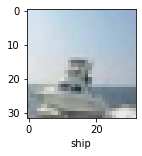

In [11]:
plot_sample(X_train, y_train, 100)

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
X_train[3][31]

array([[0.38039216, 0.30588235, 0.21960784],
       [0.36862745, 0.29411765, 0.20784314],
       [0.36470588, 0.29411765, 0.20784314],
       [0.38039216, 0.33333333, 0.23921569],
       [0.37647059, 0.3372549 , 0.23921569],
       [0.36862745, 0.32941176, 0.23137255],
       [0.37647059, 0.3372549 , 0.23921569],
       [0.30980392, 0.27843137, 0.17254902],
       [0.30588235, 0.27058824, 0.15686275],
       [0.36470588, 0.30588235, 0.19215686],
       [0.41176471, 0.32941176, 0.20784314],
       [0.41960784, 0.3372549 , 0.21960784],
       [0.38431373, 0.33333333, 0.22745098],
       [0.38823529, 0.3254902 , 0.22352941],
       [0.41568627, 0.34117647, 0.24313725],
       [0.46666667, 0.38431373, 0.29019608],
       [0.40784314, 0.34509804, 0.24313725],
       [0.40784314, 0.33333333, 0.22745098],
       [0.41568627, 0.33333333, 0.21568627],
       [0.47843137, 0.38823529, 0.2627451 ],
       [0.41960784, 0.33333333, 0.21176471],
       [0.43921569, 0.37647059, 0.25882353],
       [0.

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 35s 21ms/step - loss: 1.4507 - accuracy: 0.4792
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0886 - accuracy: 0.6214
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9547 - accuracy: 0.6678
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8709 - accuracy: 0.6978
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8036 - accuracy: 0.7210
Epoch 6/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7480 - accuracy: 0.7398
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6931 - accuracy: 0.7581
Epoch 8/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.6458 - accuracy: 0.7741
Epoch 9/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.6038 - accuracy: 0.7890
Epoch 10/10
1563/1563 [==============================] - 43s 28m

In [17]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9163 - accuracy: 0.7037


[0.9163316488265991, 0.7037000060081482]

In [21]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 10ms/step


array([[3.62767349e-03, 7.98389228e-05, 9.53060482e-03, 9.33041453e-01,
        1.37710921e-03, 1.67241655e-02, 1.42945573e-02, 1.05610229e-06,
        2.12788805e-02, 4.47045859e-05],
       [1.65143143e-02, 3.53129506e-01, 7.12037872e-05, 4.92306026e-06,
        3.06685820e-07, 1.14148776e-07, 3.90709999e-07, 1.97659958e-07,
        6.16930127e-01, 1.33489696e-02],
       [1.11200079e-01, 3.53182584e-01, 2.88645495e-02, 6.05078340e-02,
        1.05879195e-02, 5.09883929e-03, 1.23016639e-02, 8.52557924e-03,
        3.71492952e-01, 3.82379293e-02],
       [9.92162764e-01, 1.38557025e-05, 1.62803615e-03, 2.32881022e-04,
        3.59633728e-03, 1.09739358e-06, 7.28128782e-07, 4.47218306e-04,
        1.91592576e-03, 1.08314191e-06],
       [1.01034885e-07, 6.12226067e-05, 1.85585003e-02, 2.92458609e-02,
        2.88759589e-01, 2.16820254e-03, 6.61199510e-01, 8.43491605e-08,
        6.84847373e-06, 3.14593365e-08]], dtype=float32)

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

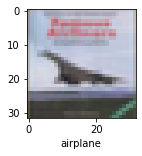

In [23]:
plot_sample(X_test, y_test,3)

In [37]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=np.array(y_classes))
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[742,  19,  82,  17,   9,   9,   9,   8,  74,  31],
       [ 32, 773,   9,  13,   4,   7,  11,   0,  27, 124],
       [ 57,   7, 692,  54,  50,  40,  60,  19,  13,   8],
       [ 30,   6, 118, 525,  63, 126,  67,  28,  20,  17],
       [ 23,   2, 141,  62, 616,  22,  62,  51,  16,   5],
       [ 18,   5,  98, 222,  33, 534,  25,  47,  11,   7],
       [  9,   4,  67,  62,  24,  11, 804,   5,  10,   4],
       [ 25,   4,  72,  47,  61,  49,   8, 710,   8,  16],
       [ 56,  28,  18,  19,   4,   7,   6,   6, 833,  23],
       [ 35,  53,  18,  16,   3,   5,   9,  12,  41, 808]])>

Text(69.0, 0.5, 'Truth')

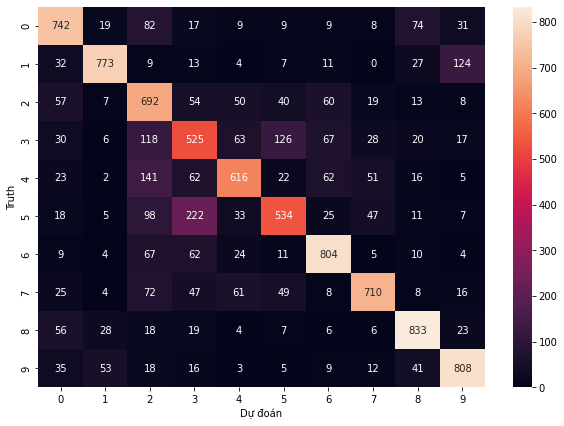

In [38]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Dự đoán')
plt.ylabel('Truth')